# loading in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../mats/2023-nwbc-reds.csv')

# Checking data characteristics

In [3]:
df.shape

(49038, 95)

In [4]:
sorted(df.columns)

['at_bat_number',
 'attack_zone',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'batter',
 'batter_name',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'delta_home_win_exp',
 'delta_run_exp',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'inning',
 'inning_topbot',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_number',
 'pitch_type',
 'pitcher',
 'pitcher.1',
 'pitcher_name',
 'plate_x',
 '

In [5]:
df.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,swing
count,48004.000000,48005.000000,48005.000000,49038.000000,49038.000000,0.0,0.0,0.0,0.0,48005.000000,...,49038.000000,49038.000000,49038.000000,49038.000000,49038.000000,49038.000000,47245.000000,49038.000000,47990.000000,49038.0
mean,89.489322,-0.937300,5.771255,603472.688201,617183.213487,NaN,NaN,NaN,NaN,9.072451,...,2.220604,2.222827,2.222950,2.251988,2.252111,2.222827,175.738724,0.000098,0.002370,0.0
std,6.011860,1.871269,0.470030,67092.014911,61535.933227,NaN,NaN,NaN,NaN,4.227762,...,2.540002,2.611473,2.539729,2.626396,2.555069,2.611473,72.048866,0.027262,0.242729,0.0
min,39.100000,-4.620000,1.140000,405395.000000,424144.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.697000,-1.110000,0.0
25%,85.100000,-2.220000,5.530000,571657.000000,592716.000000,NaN,NaN,NaN,NaN,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,0.000000,-0.066000,0.0
50%,90.300000,-1.570000,5.820000,608703.000000,641816.000000,NaN,NaN,NaN,NaN,11.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,204.000000,0.000000,-0.017000,0.0
75%,94.300000,-0.630000,6.050000,663697.000000,665665.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,224.000000,0.000000,0.033000,0.0
max,103.400000,4.460000,7.530000,703715.000000,699479.000000,NaN,NaN,NaN,NaN,14.000000,...,20.000000,20.000000,15.000000,20.000000,20.000000,20.000000,360.000000,0.858000,3.354000,0.0


In [6]:
df['total_score'] = df['home_score'] + df['away_score']
df.head(1)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17


In [7]:
df['description'].unique()

array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

# Feature engineering
creating new columns

In [8]:
strike_events = ['called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip']

In [9]:
df['is_strike'] = 0
df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

In [10]:
df['is_strike'].value_counts()

0    24800
1    24238
Name: is_strike, dtype: int64

In [11]:
df['is_2_strikes'] = 0
df.loc[df['strikes'] == 2, 'is_2_strikes'] = 1

In [12]:
df['is_high_velo'] = 0
df.loc[df['release_speed'] > 94, 'is_high_velo'] = 1

In [13]:
strike_list =  ['called_strike', 'swinging_strike']
df['strike_heart'] = 0
df.loc[(df['description'].isin(strike_list)) & (df['attack_zone'] == 'heart'), 'strike_heart'] = 1
df.iloc[:, -4:].head(5)

,is_strike,is_2_strikes,is_high_velo,strike_heart
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,1
4,1,0,1,1


In [20]:
#converted original to a function, so we can get info on other teams if needed
def team_find(df, team):
    _df = df
    _df[f'is_{team}_pitcher'] = 0
    _df.loc[((_df['home_team'] == f'{team}')
        & (_df['inning_topbot'] == 'Top')) 
        | ((_df['away_team'] == f'{team}') 
        & (_df['inning_topbot'] == 'Bot'))
        , f'is_{team}_pitcher'] = 1
    # df_1 = _df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()
    # df_2= _df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()
    # df_1 = df_1.rename(columns = {'is_strike':'avg'})
    # df_2 = df_2.rename(columns = {'is_strike':'count'})
    # df_3 = df_1.merge(df_2, on=['pitcher_name','pitch_name'])
    
    return _df

In [26]:
def pitch_find(df,team):
    df_1 = df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()
    df_2= df.loc[df[f'is_{team}_pitcher'] == 1, ['pitcher_name', 'pitch_name','is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()
    df_1 = df_1.rename(columns = {'is_strike':'avg'})
    df_2 = df_2.rename(columns = {'is_strike':'count'})
    return df_1.merge(df_2, on=['pitcher_name','pitch_name'])

# Team pitcher data frame

In [15]:
list(df['home_team'].unique())[:3]

['CIN', 'CHC', 'PIT']

In [21]:
CIN_df = team_find(df, 'CIN')

In [27]:
CIN_pitcher = pitch_find(CIN_df, 'CIN')

In [29]:
CIN_players= list(CIN_pitcher['pitcher_name'].unique())

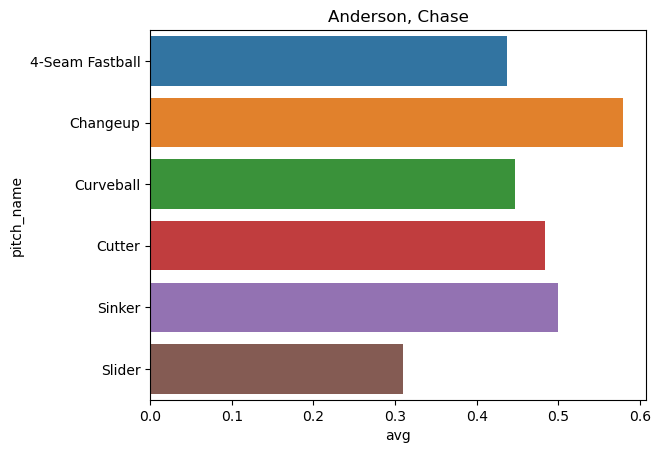

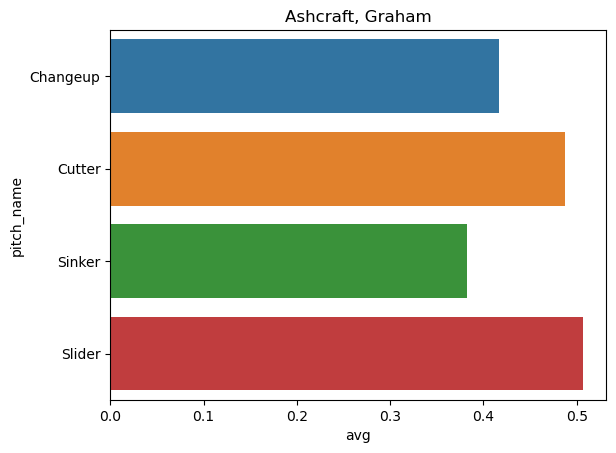

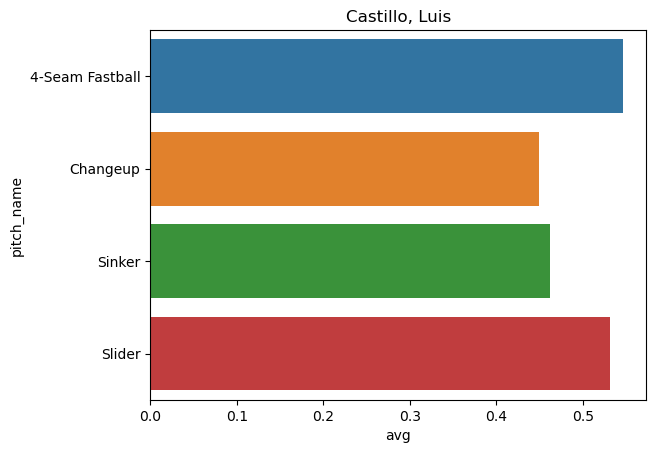

In [30]:
for name in CIN_players[:3]:
    plt.title(f'{name}')
    CIN_plt = CIN_pitcher.loc[CIN_pitcher['pitcher_name'] ==name]
    sns.barplot(data=CIN_plt, x='avg',y='pitch_name')
    plt.show()

In [32]:
#attack zone
df_attack = (CIN_df.loc[:, ['attack_zone','is_strike']].groupby(['attack_zone'], as_index=False).mean())
df_attack

,attack_zone,is_strike
0,chase,0.248736
1,heart,0.677623
2,shadow,0.565635
3,waste,0.289532


In [48]:
df_pitcher_attack= CIN_df.loc[(CIN_df['is_CIN_pitcher']==1)&(CIN_df['release_speed'].between(80,90)), ['pitcher_name', 'attack_zone','is_strike']].groupby(['pitcher_name','attack_zone'], as_index=False).agg(['mean','count']).reset_index()
df_pitcher_attack

pitcher_name attack_zone is_strike      
                                       mean count
0     Anderson, Chase       chase  0.271429    70
1     Anderson, Chase       heart  0.809524    42
2     Anderson, Chase      shadow  0.584071   113
3     Anderson, Chase       waste  0.187500    16
4    Ashcraft, Graham       chase  0.406250   128
..                ...         ...       ...   ...
142       Zeuch, T.J.       heart  0.666667    30
143       Zeuch, T.J.      shadow  0.408163    49
144       Zeuch, T.J.       waste  0.200000    15
145      Zimmer, Kyle       chase  1.000000     2
146      Zimmer, Kyle      shadow  1.000000     2

[147 rows x 4 columns]